# An individual household electric power consumption

## Objectives
This study has the objective to evaluate the reactive power consumption versus the active power consumption based on the available data. Note that currently, households are not charged for the reactive power that they consume from the energy grid, only for the active power. 

This study will try to evaluate if the reactive power consumption is already in critical levels, or if it will be cause of concerns in the future. 


## About the Data

### Origin
The data was downloaded from the UCI Machine Learning Repository (link in the references). It contains "measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months)."

 
### Business Problem

While billing for residences is usually done considering only the active power (Watts), households can also consumes reactive power (also known as the useless power) from the energy grid. Usually the amount of reactive power consumed from the grid is only a fraction of the active power (less than 5% in most cases), so the power distribution company do not have to worry about it.  But how it´s changing over the years? Today we have more eletronics with capacitors, induction heating systems and even wireless power transfers, all of those spending more reactive energy.

This study will look at the consumption of this single household over the years to try to understand if there is any trend in it´s consumption and if it´s necessary to change the billing system to account for the reactive power or not. 


### Volume of Data
This dataset contains 2.075.259 measurements, for 47 months between December 2006 and November 2010


### Data Dictionary
    1.date: Date in format dd/mm/yyyy  
    2.time: time in format hh:mm:ss
    3.global_active_power: household global minute-averaged active power (in kilowatt)
    4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) *Note*: We are assuming that´s in kVAR instead of kW
    5.voltage: minute-averaged voltage (in volt)
    6.global_intensity: household global minute-averaged current intensity (in ampere)
    7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
    8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
    9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

Notes  
    1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.  
    2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

### Assumptions

Since kilowatts are NOT used to represent reactive power, we are assuming that the unit of global_reactive_power is kVAR.
The reactive power measured is obtained from the power grid, increasing costs for the energy company.



## References
Original data available at:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

About Active and Reactive Power
https://aperc.gov.in/admin/upload/151340198613587660935a34ae822cf4c.pdf

https://www.electricaltechnology.org/2019/08/difference-between-active-and-reactive-power.html

https://www.allaboutcircuits.com/textbook/alternating-current/chpt-11/true-reactive-and-apparent-power/

https://en.wikipedia.org/wiki/AC_power

https://integratedelectronics.blog/knowledge-base/why-there-is-no-reactive-power-in-dc/

https://www.fluke.com/en-us/learn/blog/power-quality/power-factor-formula

## Exploratory Data Analysis

What do we have in this dataset? How it´s represented? All the necessary information is already represented or do I need to do some calculations?

Those are some of the questions that I usually try to answer in the EDA. Note that I already know some of them since I already read the dictionary of the dataset. 

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/household_power_consumption.txt", sep = ";")

C:\Users\CooperMind\AppData\Local\Temp\ipykernel_16744\625677678.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/household_power_consumption.txt", sep = ";")


In [4]:
# Checking if we got what we expected
print(df.shape ==  (2075259, 9))
df.head()

True


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
# Most of the columns were read as strings:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
# Let´s reload the data with the correct types:
# Note that we could not read some of the float columnas as float because of the "?" character. 
# I Just added them as na_values
numeric_types = {"Global_active_power": "float",
    "Global_reactive_power": "float",
    "Voltage": "float",
    "Global_intensity": "float",
    "Sub_metering_1": "float",
    "Sub_metering_2": "float",
    "Sub_metering_3": "float"}

df = pd.read_csv("data/household_power_consumption.txt", sep = ";",
                parse_dates={'timestamp' : ['Date', 'Time']}, infer_datetime_format=True, 
                dtype=numeric_types, na_values="?")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   timestamp              datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [7]:
# All column names are now lower_snake_case. 
df.columns = df.columns.str.lower()

# Get meaningfull names for the sub_meterings in the future.
def with_meaningfull_names(df):
    return df.rename(columns = {"sub_metering_1": "sub_metering_1_kitchen","sub_metering_2": "sub_metering_2_laundry", "sub_metering_3": "sub_metering_3_water_heater_air_conditioner"})

## NA Analysis
By the dataset info, we expect to see at least 1.25% of missings, but how it´s distributed?


In [8]:
# Which Columns? 
df.isna().mean()

timestamp                0.000000
global_active_power      0.012518
global_reactive_power    0.012518
voltage                  0.012518
global_intensity         0.012518
sub_metering_1           0.012518
sub_metering_2           0.012518
sub_metering_3           0.012518
dtype: float64

In [9]:
# Number of different fields with missings per row
# On the index is the number of fields missings
pd.DataFrame({"Observations": df.isna().sum(axis=1).value_counts(),
              "PCT": np.round(100*df.isna().sum(axis=1).value_counts()/df.shape[0], 2)})


,MissingFields,PCT
0,2049280,98.75
7,25979,1.25


As stated by the data provider, only 1.25% of the data contains missings. And now we know that if one of the fields is missing, every other fild is also missing. We can probably remove those values, but first let´s see if they are concentrated in one specific date or if they are distributed in the dataframe. 

<AxesSubplot:xlabel='timestamp'>

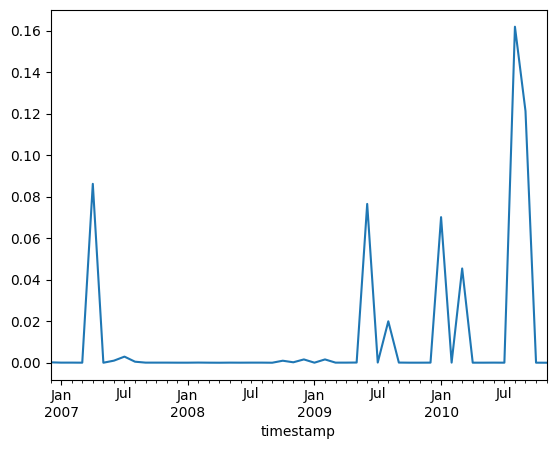

In [10]:
# Used voltage as column, but could've selected any of the columns with missings. 
df.set_index('timestamp').resample("M")["voltage"].agg(lambda c: c.isna().mean()).plot()

There is no unique period of time with all the missings, and there seems to be a pattern of when they happen. 

In most of the cases, we have less than 8% of missings in every months, with the exception of Aug/2010 and Sep/2010. 

Even tough Jul/2010 has almost 16% of missings, since it´s a big dataset I will remove all of those observations and won´t try to fill the values.



In [82]:
df = df.dropna()
df.isna().mean()

timestamp                          0.0
global_active_power                0.0
global_reactive_power              0.0
voltage                            0.0
global_intensity                   0.0
sub_metering_1                     0.0
sub_metering_2                     0.0
sub_metering_3                     0.0
minutes                            0.0
not_measured_active_consumption    0.0
apparent_power                     0.0
power_factor                       0.0
dtype: float64

### Numeric Variables

In [12]:
# Distributions
with_meaningfull_names(df).describe().round(2)

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1_kitchen,sub_metering_2_laundry,sub_metering_3_water_heater_air_conditioner
count,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00
mean,1.09,0.12,240.84,4.63,1.12,1.30,6.46
std,1.06,0.11,3.24,4.44,6.15,5.82,8.44
min,0.08,0.00,223.20,0.20,0.00,0.00,0.00
25%,0.31,0.05,238.99,1.40,0.00,0.00,0.00
50%,0.60,0.10,241.01,2.60,0.00,0.00,1.00
75%,1.53,0.19,242.89,6.40,0.00,1.00,17.00
max,11.12,1.39,254.15,48.40,88.00,80.00,31.00


## Feature Engineering

In those steps I created some derivated attributes. The Power Factor is an very interesting measure when we consider the problem that I was trying to solve (evaluate if the energy company is losing money by not billing the reactive power), but ended up being a bit too complicate to explain in the power point and it´s only an indirect metric, so I ended up not putting it in the presentation. Noneless.


### Apparent Power 

The active/real energy is the energy that the equipments actually uses to work. It's usually used to heat, to move something or to emit light. The reactive energy is an energy that´s lost in the process of energy transmission, when the energy passes through capacitors or generates magnectic fields by induction. This extra energy cannot be measured as the active energy, but also adds a toll to the power grid. The apparent power takes into account both the active power and the reactive power, and can be calculated with simple trigonometry:  
  
  

<div>
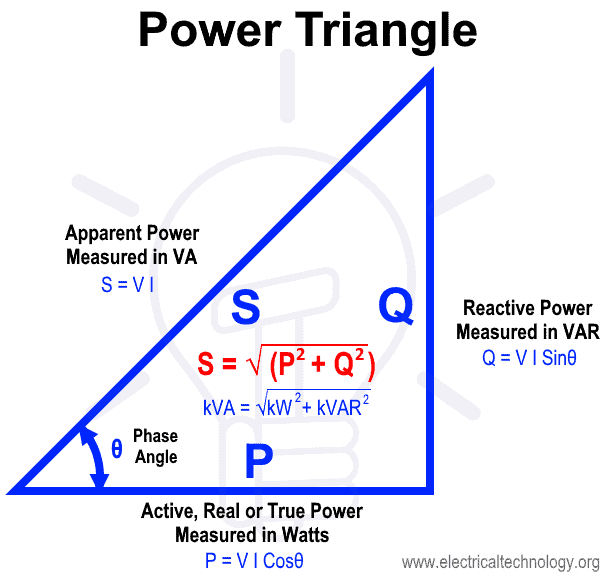
</div>



### Power Factor and other features

The power factor is the ratio Active Power / Apparent Power. For households it´s usually over 90%, meaning that most of the energy consumed in the house comes from energy actually used, and only 10% is wasted with this useless energy. If those ratios are still constant, there is no need to change the billing methodology. 

If those ratios are decreasing, however, we need to start taking into account the reactive power to calculate the billings, which will require specialized equipments and other investiments.
  
  

In [13]:
def add_power_factor(df):
    df = df.copy()            
    # The apparent power can be calculated using pitagoras
    df["apparent_power"] = np.sqrt(np.power(df["global_active_power"], 2) + np.power(df["global_reactive_power"],2))
    
    # The power factor is defined as Active Power / Apparent Power. 
    df["power_factor"] = 100*df["global_active_power"]/df["apparent_power"]
    return(df)


def add_features(df):
    df = df.copy()
    
    minutes_column = "minutes"
    if not minutes_column in df.columns:
        # Should have no columns with NAs at this point, but if we have, we won't count the minutes for those observations
        df['minutes'] = np.where(df["voltage"].isna(), 0, 1)
    
    # Using minutes_column allows the formula to also work in the aggregated data
    # minutes_column is equal to 1 for the non aggregated data
    df["not_measured_active_consumption"] = np.maximum(0, (1000*df["global_active_power"]*df[minutes_column]/60) - df["sub_metering_1"] - df["sub_metering_2"] - df["sub_metering_3"])
    
    return add_power_factor(df)

df = add_features(df)
df.describe().round(2)

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,minutes,not_measured_active_consumption,apparent_power,power_factor
count,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.0,2049280.00,2049280.00,2049280.00
mean,1.09,0.12,240.84,4.63,1.12,1.30,6.46,1.0,9.31,1.11,96.37
std,1.06,0.11,3.24,4.44,6.15,5.82,8.44,0.0,9.59,1.05,5.81
min,0.08,0.00,223.20,0.20,0.00,0.00,0.00,1.0,0.00,0.08,55.59
25%,0.31,0.05,238.99,1.40,0.00,0.00,0.00,1.0,3.80,0.33,95.20
50%,0.60,0.10,241.01,2.60,0.00,0.00,1.00,1.0,5.50,0.63,99.34
75%,1.53,0.19,242.89,6.40,0.00,1.00,17.00,1.0,10.37,1.54,99.97
max,11.12,1.39,254.15,48.40,88.00,80.00,31.00,1.0,124.83,11.12,100.00


In [14]:
(100*(df.power_factor < 90).mean()).round(2)

13.55

Most of the observations in the dataset have the Power Factor over 95%, which is pretty high. 
And only 13% of the measures have a power factor of less than 90%, which is good.

If those measures are not concentrated at the latest months, them the current billing system should still be good enough.



<AxesSubplot:xlabel='timestamp'>

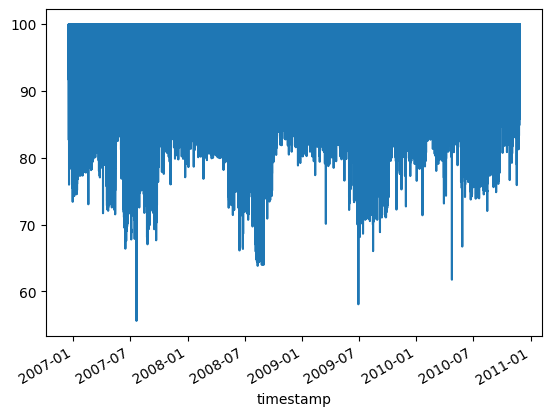

In [16]:
df.set_index("timestamp").power_factor.plot()

Since the power level measures will depends a lot of which equipament is being used, it does not make sense to analyse it purely on the minute level. Let´s aggregate the data and do an analysis closer to what is interesting for an energy company:

In [17]:
month_agg = df.set_index("timestamp").resample("M")
day_agg  = df.set_index("timestamp").resample("D")

def aggregate_data(agg_df):
    ''' This aggregation takes care to correctly deal with the aggregation of the variables:
        global_active_power
        global_reactive_power
        voltages
        global_intensity
        
        Those variables are all averages by minute. 
        
        To keep their definition in the aggregation, we need to average them by the time. 
    '''
    sum_df = agg_df.sum()
    variables_mean_by_minute = ['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity']
    sum_df[variables_mean_by_minute] = sum_df[variables_mean_by_minute].divide(sum_df["minutes"], axis=0)
    return add_features(sum_df)
   
    
day_df = aggregate_data(day_agg)
month_df = aggregate_data(month_agg)


How the aggregation will affects our variables?

It will lower the global_active_power, the global_reactive_power, the voltage and the global intensity maximums and increase their minimums, since those values are averages per minute.

It also increases the sub_metering and the not measured active values, since those values are measures of accumulated energy in the mounth. 

The power factors are stabilized with the aggregation, with a reduced variance. 

In [18]:
df.describe().round(2)

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,minutes,not_measured_active_consumption,apparent_power,power_factor
count,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.0,2049280.00,2049280.00,2049280.00
mean,1.09,0.12,240.84,4.63,1.12,1.30,6.46,1.0,9.31,1.11,96.37
std,1.06,0.11,3.24,4.44,6.15,5.82,8.44,0.0,9.59,1.05,5.81
min,0.08,0.00,223.20,0.20,0.00,0.00,0.00,1.0,0.00,0.08,55.59
25%,0.31,0.05,238.99,1.40,0.00,0.00,0.00,1.0,3.80,0.33,95.20
50%,0.60,0.10,241.01,2.60,0.00,0.00,1.00,1.0,5.50,0.63,99.34
75%,1.53,0.19,242.89,6.40,0.00,1.00,17.00,1.0,10.37,1.54,99.97
max,11.12,1.39,254.15,48.40,88.00,80.00,31.00,1.0,124.83,11.12,100.00


In [19]:
day_df.describe().round(2)

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,minutes,not_measured_active_consumption,apparent_power,power_factor
count,1433.00,1433.00,1433.00,1433.00,1442.00,1442.00,1442.00,1442.00,1433.00,1433.00,1433.00
mean,1.09,0.12,240.84,4.63,1594.41,1845.38,9178.34,1421.14,13320.60,1.10,98.71
std,0.42,0.03,2.05,1.74,1587.84,2089.59,3787.90,151.90,6150.53,0.42,2.27
min,0.17,0.06,231.09,0.81,0.00,0.00,0.00,0.00,152.97,0.21,83.26
25%,0.82,0.10,240.09,3.50,555.50,424.25,6604.25,1440.00,9261.40,0.83,98.76
50%,1.08,0.12,240.97,4.56,1109.00,678.50,9251.00,1440.00,12577.80,1.09,99.39
75%,1.32,0.14,241.88,5.54,2196.75,2712.75,11708.50,1440.00,16498.83,1.33,99.66
max,3.31,0.29,247.44,14.03,11178.00,12109.00,23743.00,1440.00,61736.43,3.32,99.96


In [20]:
month_df.describe().round(2)

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,minutes,not_measured_active_consumption,apparent_power,power_factor
count,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00
mean,1.10,0.12,240.85,4.66,47898.65,55438.15,275732.65,42693.33,397675.31,1.11,98.97
std,0.30,0.02,1.56,1.22,15409.62,16724.15,68107.52,3678.92,133588.51,0.29,1.44
min,0.28,0.09,235.18,1.26,3873.00,22264.00,79665.00,21992.00,99896.00,0.30,90.77
25%,0.97,0.11,240.36,4.14,41606.50,44546.50,228893.00,43021.00,292970.78,0.97,98.88
50%,1.12,0.12,240.88,4.71,48153.00,53540.00,290232.00,43474.50,398091.30,1.13,99.39
75%,1.28,0.13,241.74,5.36,57867.50,63737.75,317839.75,44638.00,473983.82,1.29,99.65
max,1.90,0.19,244.08,8.03,75737.00,104762.00,411714.00,44640.00,690625.50,1.91,99.82


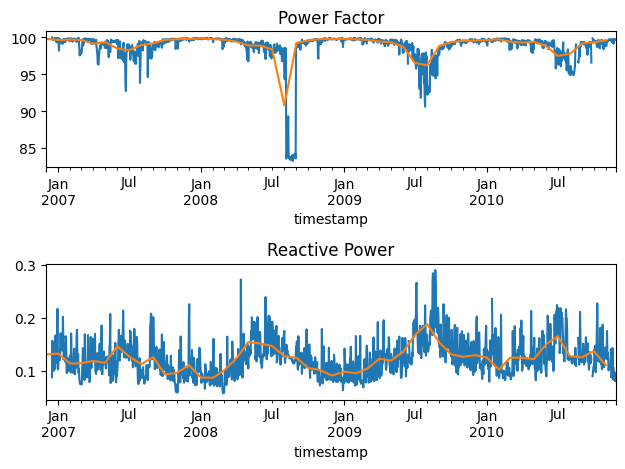

In [21]:
# Now let´s see the power factor variations 
plt.subplot(2,1,1)
day_df.power_factor.plot()
month_df.power_factor.plot()
plt.title("Power Factor")
plt.subplot(2,1,2)
# And also the reactive power variations 
day_df.global_reactive_power.plot()
month_df.global_reactive_power.plot()
plt.title("Reactive Power")
plt.tight_layout()

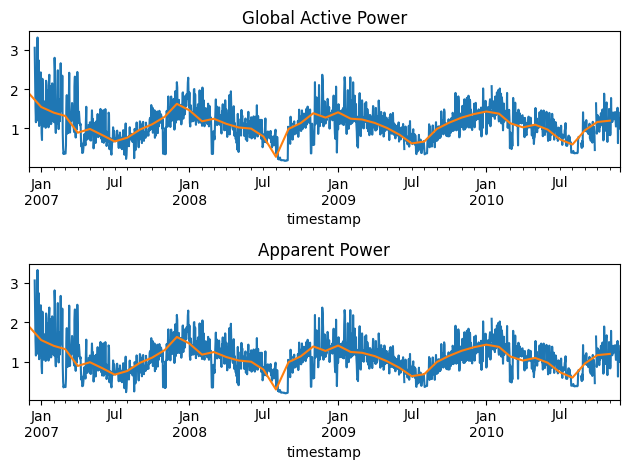

In [24]:
# Now let´s see the active power variations 
plt.subplot(2,1,1)
day_df.global_active_power.plot()
month_df.global_active_power.plot()
plt.title("Global Active Power")
plt.subplot(2,1,2)
# And also the apparent power variations 
day_df.apparent_power.plot()
month_df.apparent_power.plot()
plt.title("Apparent Power")
plt.tight_layout()

Altough we can see a pattern in the Power Factor, it does not seems to be becoming worse with the years. On contraty, the power factors in July/2010 are higher than those in Jul/2009, which is good. We also can note that the Power Factor are lowest in the summer and higher in the winter, which makes sense.


**Alert**:
Note that something happened between Jul/2009 and Oct/2009 which caused a massive drop in the Power Factor. This dropped in levels below what is even seen in some industries with a lot of motors and inductor heaters, which is **very** strange.

Let´s look at the other variables in the dataset to see if we see something strange:

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

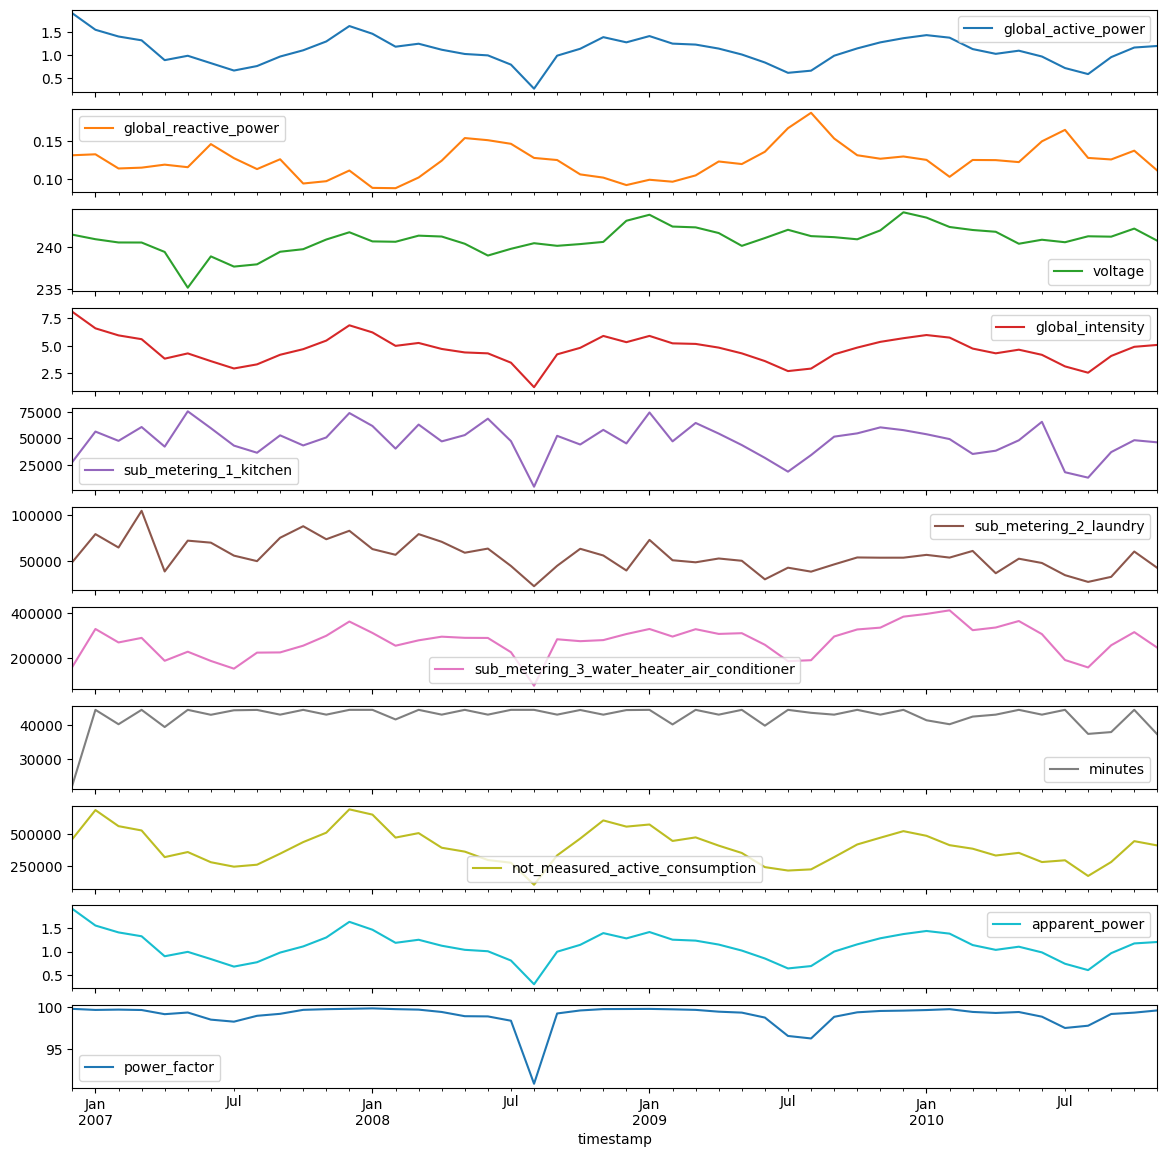

In [23]:
with_meaningfull_names(month_df).plot(subplots=True, figsize=(14,14))

We see that we have the lowest measures for all the sub meters and for the global active power, but usually around those months, every year, we see a drop in the global active power, and the reactive power sometimes stay the same, and sometimes even increase. Altough we see a big drop in the power factor, we cannot be sure that this is some problem in the data or if it´s normal behaviour. 

Also note that the global reactive power do not have big changes, and it´s not the power factor, but the usage of reactive power that´s bad for the power grid. 


But let´s see how the global active power behavied on the months from Aug/2008 to Sep/2008


Looking at a 'zoomed' version of those plots (below), we that there is a pattern of some days with extremely low active power between August and September. Maybe on those days only equipments with requires high reactive power are used and the fact that in 2008 there where more of those days is what brought down the power factor of this point.



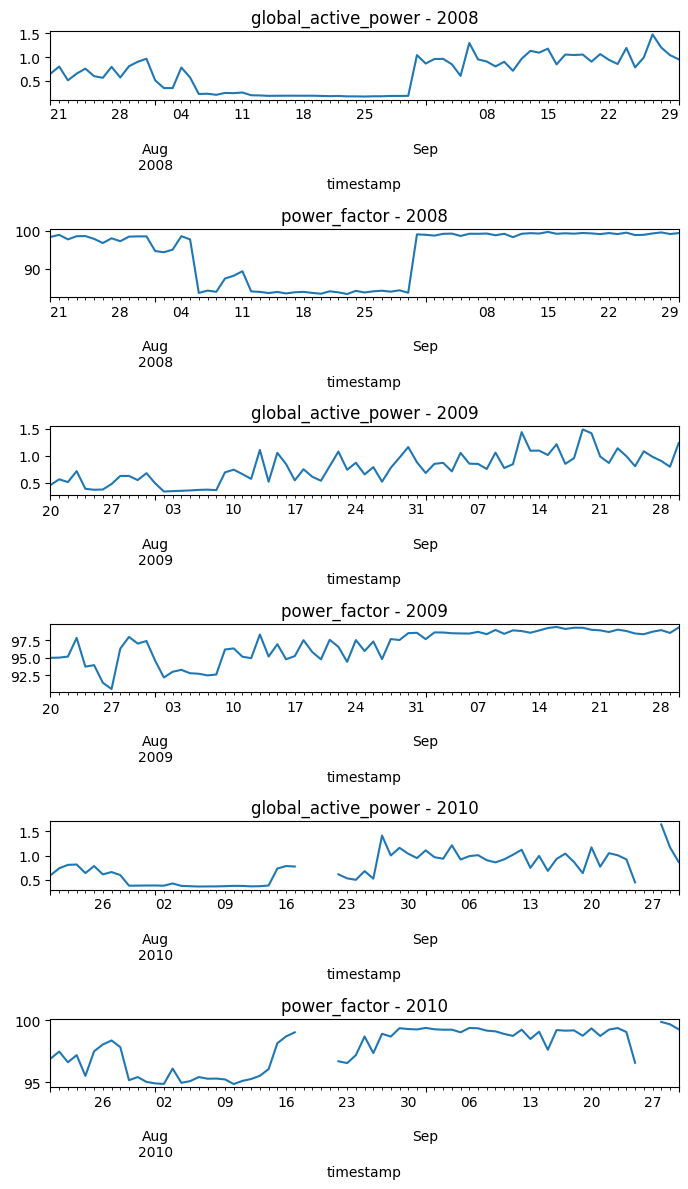

In [25]:

# Zooming in to define the period to be removed
variables = ["global_active_power", "power_factor"]

fig, ax = plt.subplots(6,1, figsize=(7,12))
with_meaningfull_names(day_df).query('index >= "2008/07/20" and index <= "2008/09/30"')[variables[0]].plot(ax=ax[0])
ax[0].set_title(variables[0] +" - 2008")
with_meaningfull_names(day_df).query('index >= "2008/07/20" and index <= "2008/09/30"')[variables[1]].plot(ax=ax[1])
ax[1].set_title(variables[1] +" - 2008")

with_meaningfull_names(day_df).query('index >= "2009/07/20" and index <= "2009/09/30"')[variables[0]].plot(ax=ax[2])
ax[2].set_title(variables[0] +" - 2009")
with_meaningfull_names(day_df).query('index >= "2009/07/20" and index <= "2009/09/30"')[variables[1]].plot(ax=ax[3])
ax[3].set_title(variables[1] +" - 2009")

with_meaningfull_names(day_df).query('index >= "2010/07/20" and index <= "2010/09/30"')[variables[0]].plot(ax=ax[4])
ax[4].set_title(variables[0] +" - 2010")
with_meaningfull_names(day_df).query('index >= "2010/07/20" and index <= "2010/09/30"')[variables[1]].plot(ax=ax[5])
ax[5].set_title(variables[1] +" - 2010")
plt.tight_layout()

### Correlation Analysis

Now lets try to asses the bigest 'pain points' when we are talking about Reactive Power. Or which conditions leads to a lower Power Factor. 

My first hipotesis would be that the use of air conditioner and washing machine should rise the reactive power and decrease the power factor (mostly in the summer), while the use of water heater and oven should increase the active power and increase the power factor.
Note that we can only know the usage of Active Power in each of the 3 sub measures, so we cannot be sure of what's being used or not. 



In [26]:
# Since the use of air conditioner and water heater should be related to the 4 seasons, I´m splitting this dataset in 4:
month_df["season"] =  month_df.index.month.map({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1})

winter_df = month_df[month_df["season"] == 1]
spring_df = month_df[month_df["season"] == 2]
summer_df = month_df[month_df["season"] == 3]
fall_df   = month_df[month_df["season"] == 4]


In [27]:
def calculate_corr(df, plot=False):
    columns_cor = ['power_factor', 'global_reactive_power', 'global_active_power', 
        'sub_metering_1_kitchen', 'sub_metering_2_laundry',
        'not_measured_active_consumption',
       'sub_metering_3_water_heater_air_conditioner']
    correlations = with_meaningfull_names(df)[columns_cor].corr()
    return correlations


In [28]:
# Months Correlation
c_all = calculate_corr(month_df)
c_winter = calculate_corr(winter_df)
c_spring = calculate_corr(spring_df)
c_summer = calculate_corr(summer_df)
c_fall = calculate_corr(fall_df)
all_correlations_power_factor = pd.concat([ x[["power_factor"]] for x in [c_all, c_winter, c_spring, c_summer, c_fall]], axis=1)
all_correlations_reactive_power = pd.concat([ x[["global_reactive_power"]] for x in [c_all, c_winter, c_spring, c_summer, c_fall]], axis=1)
all_correlations_power_factor.columns = ["PF - "+n for n in ["All", "Winter","Spring","Summer","Fall"]]
all_correlations_reactive_power.columns = ["RP - "+n for n in ["All", "Winter","Spring","Summer","Fall"]]

In [29]:
print("Correlations with Reactive Power - Month")
display(all_correlations_reactive_power.multiply(100).round(2))

Correlations with Reactive Power - Month


,RP - All,RP - Winter,RP - Spring,RP - Summer,RP - Fall
power_factor,-45.80,-64.70,-85.32,-3.39,-88.95
global_reactive_power,100.00,100.00,100.00,100.00,100.00
global_active_power,-49.44,61.73,-43.38,15.54,-51.56
sub_metering_1_kitchen,-28.04,-9.92,-38.89,8.48,17.39
sub_metering_2_laundry,-33.72,19.35,-21.07,3.20,-51.19
not_measured_active_consumption,-58.46,7.41,-52.99,25.08,-60.29
sub_metering_3_water_heater_air_conditioner,-30.44,3.89,8.65,17.68,33.44


Interesting. The active energy not measured on the sub meterings are the ones that most "strongly" correlates with the reactive energy. It´s mostly a negative correlation, meaning that the greater amounts of non measured actived energy are associated with lesser reactive power, except in the Summer, when it has the strongest relationship in this season, and it´s positive.

Considering the whole year, the correlation between the reactive power and the active power is (altough weak) always negative, meaning that an increase of the use of more active power is  associated with less wasted power. 

In the Winter, the two kind of power are more independent of each other. The strongest correlation is between the laundry and the global reactive power, and it´s positive.

In the Spring, we see the same tendencies as the whole year, except by the sub_metering_3, that slight positive.

In the Summer we see a stronger positive relationship between the active power not measured and the global reactive power, and some relationshib with the sub_metering_3. 

In the Fall we see the "strongest negative corrrelation (-60%) and also the strongest correlation of the sub_metering_3 (and positive).

In [30]:
print("Correlations with Power Factor - Month")
display(all_correlations_power_factor.multiply(100).round(2))

Correlations with Power Factor - Month


,PF - All,PF - Winter,PF - Spring,PF - Summer,PF - Fall
power_factor,100.00,100.00,100.00,100.00,100.00
global_reactive_power,-45.80,-64.70,-85.32,-3.39,-88.95
global_active_power,73.18,19.52,81.32,87.26,81.06
sub_metering_1_kitchen,61.97,3.92,37.87,65.36,9.48
sub_metering_2_laundry,47.92,5.27,46.91,56.84,43.81
not_measured_active_consumption,65.08,15.81,79.07,83.09,83.36
sub_metering_3_water_heater_air_conditioner,65.07,-39.02,27.44,75.55,2.29


More interesting tough, is to see that no matter how the active and reactive power usage are correlated individually, the Power Factor are usually positivelly affected with the increase of the active energy for all the active energy meterings, except for the sub_metering_3 in the winter.

This can be explained by the fact that even if the reactive power goes up with the active power, the active power normally increases more than the reactive power.

### Predicting Reactive Power

In [31]:
# Separating an out of time sample
test_data = df.query("timestamp >= '2009-09-13'").set_index('timestamp')
train_data     = df.query("timestamp < '2009-09-13'").set_index('timestamp')

In [34]:

def date_transform(data):
    '''
    Reference Code: https://www.kaggle.com/code/mfaaris/3-ways-to-deal-with-time-series-forecasting
    Adapted
    
    '''
    df = data.copy()
    

    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.dayofweek
    df['Dayofmonth'] = df.index.day
    df['Dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week.astype('int')
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year
    df["season"] = df.index.month.map({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1})

    
    X = df.drop(['global_reactive_power', "apparent_power", "minutes"], axis=1)
    y = df['global_reactive_power']
    
    return X, y

train_x, train_y = date_transform(train_data)
train_full = pd.concat([train_x, train_y], axis=1)
test_x, test_y = date_transform(test_data)



The objective of this first model was to better understand how we can infer the reactive power based on the available information of the active power, and see if any usefull insight could be brought from it´s coefficients. 


In [35]:
import statsmodels.formula.api as smf
model = smf.ols("global_reactive_power ~ global_active_power + voltage + global_intensity + sub_metering_1 + sub_metering_2 + sub_metering_3 + C(season) + Hour + C(Dayofweek) + Dayofmonth + Dayofyear + weekofyear + C(Month) + C(Quarter) + Year", data = train_full)


In [36]:
model_fited = model.fit()
model_fited.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     global_reactive_power   R-squared:                       0.275
Model:                               OLS   Adj. R-squared:                  0.275
Method:                    Least Squares   F-statistic:                 1.938e+04
Date:                   Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                           23:30:00   Log-Likelihood:             1.3473e+06
No. Observations:                1433493   AIC:                        -2.694e+06
Df Residuals:                    1433464   BIC:                        -2.694e+06
Df Model:                             28                                         
Covariance Type:               nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.6181      0.223    -11.738      0.000      -3.055      -2.181
C(season)[T.2]         -0.0351      0.008     -4.530      0.000      -0.050      -0.020
C(season)[T.3]         -0.0570      0.014     -4.212      0.000      -0.083      -0.030
C(season)[T.4]         -0.0926      0.016     -5.676      0.000      -0.125      -0.061
C(Dayofweek)[T.1]      -0.0001      0.000     -0.394      0.694      -0.001       0.000
C(Dayofweek)[T.2]       0.0028      0.000      9.603      0.000       0.002       0.003
C(Dayofweek)[T.3]       0.0002      0.000      0.609      0.543      -0.000       0.001
C(Dayofweek)[T.4]       0.0018      0.000      6.176      0.000       0.001       0.002
C(Dayofweek)[T.5]       0.0161      0.000     54.287      0.000       0.016       0.017
C(Dayofweek)[T.6]       0.0080      0.000     26.904      0.000       0.007       0.009
C(Month)[T.2]          -0.0283      0.006     -4.925      0.000      -0.040      -0.017
C(Month)[T.3]          -0.0199      0.003     -6.133      0.000      -0.026      -0.014
C(Month)[T.4]           0.0039      0.001      6.897      0.000       0.003       0.005
C(Month)[T.5]          -0.0191      0.005     -3.787      0.000      -0.029      -0.009
C(Month)[T.6]          -0.0225      0.005     -4.519      0.000      -0.032      -0.013
C(Month)[T.7]          -0.0004      0.001     -0.282      0.778      -0.003       0.002
C(Month)[T.8]          -0.0340      0.007     -4.765      0.000      -0.048      -0.020
C(Month)[T.9]          -0.0546      0.010     -5.405      0.000      -0.074      -0.035
C(Month)[T.10]          0.0048      0.000     13.922      0.000       0.004       0.005
C(Month)[T.11]         -0.0429      0.006     -7.165      0.000      -0.055      -0.031
C(Month)[T.12]         -0.1692      0.028     -6.079      0.000      -0.224      -0.115
C(Quarter)[T.2]        -0.0377      0.009     -3.975      0.000      -0.056      -0.019
C(Quarter)[T.3]        -0.0890      0.019     -4.777      0.000      -0.126      -0.052
C(Quarter)[T.4]        -0.2072      0.034     -6.086      0.000      -0.274      -0.140
global_active_power    -0.8854      0.002   -497.078      0.000      -0.889      -0.882
voltage                 0.0063   3.22e-05    195.437      0.000       0.006       0.006
global_intensity        0.2205      0.000    525.647      0.000       0.220       0.221
sub_metering_1         -0.0012   1.61e-05    -72.953      0.000      -0.001      -0.001
sub_metering_2         -0.0011   1.62e-05    -68.394      0.000      -0.001      -0.001
sub_metering_3      -4.288e-05   1.45e-05     -2.949      0.003   -7.14e-05   -1.44e-05
Hour                    0.0010    1.2e-05     86.034      0.000       0.001       0.001
Dayofmonth             -0.0012      0.000     -6.240      

In [83]:
# For the model to be able to tell us anything, it must be a good model. Let´s see how it performs
predicted_train_y = model_fited.predict(train_x)
predicted_test_y  = model_fited.predict(test_x)


In [38]:
# Since the evaluation will be qualitative, and not quantitative, plotting seems a good way to evaluate the results.

# Defining helper functions
def prepare_to_plot(X, actual_y, predicted_y, period = None):
    real_df = X.copy()
    #real_df["minute"] = np.where(real_df["voltage"].isna(), 0, 1)
    real_df["minute"] = 1
    if not period:
        pred_df = real_df.copy()
        real_df["global_reactive_power"] = actual_y
        pred_df["global_reactive_power"] = predicted_y

    else:
        real_df = real_df.resample(period).agg("sum")
        pred_df = real_df.copy()
        real_df["global_reactive_power"] = actual_y.resample(period).agg("sum").divide(real_df["minute"], axis = 0)
        pred_df["global_reactive_power"] = predicted_y.resample(period).agg("sum").divide(real_df["minute"], axis = 0)
        if "global_active_power" in real_df.columns:
            real_df["global_active_power"] = real_df["global_active_power"].divide(real_df["minute"], axis=0)
            pred_df["global_active_power"] = pred_df["global_active_power"].divide(real_df["minute"], axis=0)

    if "global_active_power" in real_df.columns:
        real_df = add_power_factor(real_df)
        pred_df = add_power_factor(pred_df)

    return(real_df, pred_df)

def plot_reactive_power(real_df, pred_df):
    if "power_factor" in real_df.columns:
        plt.subplot(2,1,1)
        real_df["global_reactive_power"].plot(c="red")
        pred_df["global_reactive_power"].plot(c="green", linestyle="dotted")
        plt.title("Reactive Energy Power Consumption")

        plt.subplot(2,1,2)
        real_df["power_factor"].plot(c="red")
        pred_df["power_factor"].plot(c="green", linestyle="dotted")
        plt.title("Power Factor")
        plt.tight_layout()
    else:
        real_df["global_reactive_power"].plot(c="red")
        pred_df["global_reactive_power"].plot(c="green", linestyle="dotted")
        plt.title("Reactive Energy Power Consumption")


In [42]:
real_df_train, pred_df_train = prepare_to_plot(train_x, train_y, predicted_train_y, "M")
real_df_test, pred_df_test = prepare_to_plot(test_x, test_y, predicted_test_y, "M")

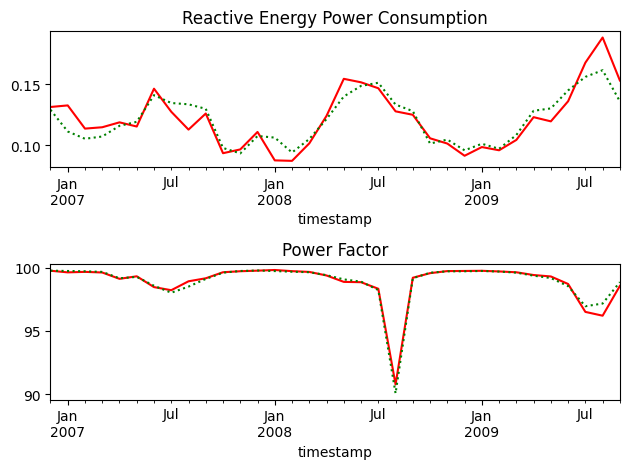

In [43]:
# Very good, for a linear model
plot_reactive_power(real_df_train, pred_df_train)

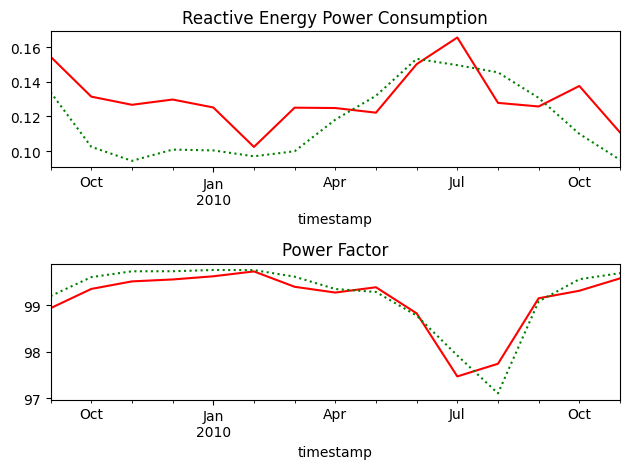

In [44]:
# Good enough, the Power Factors are pretty close.
plot_reactive_power(real_df_test, pred_df_test)

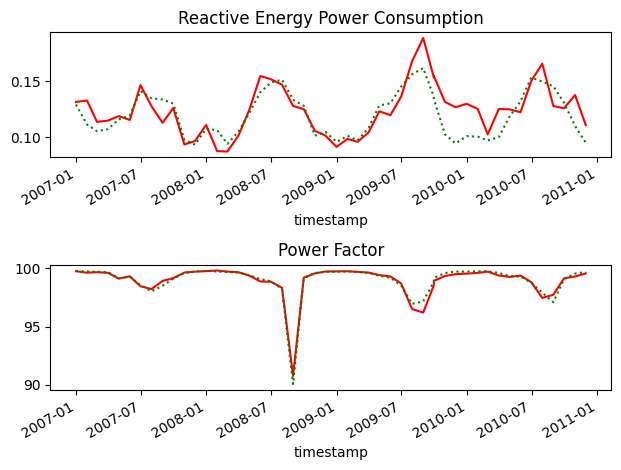

In [45]:
# A plot of the whole period. 
# Note that we cannot do forecast because we do not have future information about most of the attributes used
plot_reactive_power(pd.concat([real_df_train, real_df_test], axis=0), 
                    pd.concat([pred_df_train, pred_df_test], axis=0))

#### Forecast model
This model will be used to estimate the global_reactive_power changes in the future

Altough it´s not actually capable of doing acurate predictions each day, the linear model will be good enough to answer the question: The reactive power consumption will go higher? How much do we expect it to be one year from now? 

In [70]:
forecast_model = smf.ols("global_reactive_power ~ C(season) + Dayofyear + Year", data = train_full).fit()
forecast_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     global_reactive_power   R-squared:                       0.021
Model:                               OLS   Adj. R-squared:                  0.021
Method:                    Least Squares   F-statistic:                     6152.
Date:                   Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                           23:55:04   Log-Likelihood:             1.1324e+06
No. Observations:                1433493   AIC:                        -2.265e+06
Df Residuals:                    1433487   BIC:                        -2.265e+06
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.7710      0.238    -24.210      0.000      -6.238      -5.304
C(season)[T.2]     0.0151      0.000     59.495      0.000       0.015       0.016
C(season)[T.3]     0.0392      0.000    145.684      0.000       0.039       0.040
C(season)[T.4]     0.0047      0.000     14.081      0.000       0.004       0.005
Dayofyear       1.563e-05    1.2e-06     13.038      0.000    1.33e-05     1.8e-05
Year               0.0029      0.000     24.642      0.000       0.003       0.003
==============================================================================
Omnibus:                   322054.295   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           791653.446
Skew:                           1.245   Prob(JB):                         0.00
Kurtosis:                       5.656   Cond. No.                     5.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# Visual Inspection of the results
predicted_train_y = forecast_model.predict(train_x)
predicted_test_y = forecast_model.predict(test_x)
real_df_train, pred_df_train = prepare_to_plot(train_x, train_y, predicted_train_y, "M")
real_df_test, pred_df_test = prepare_to_plot(test_x, test_y, predicted_test_y, "M")


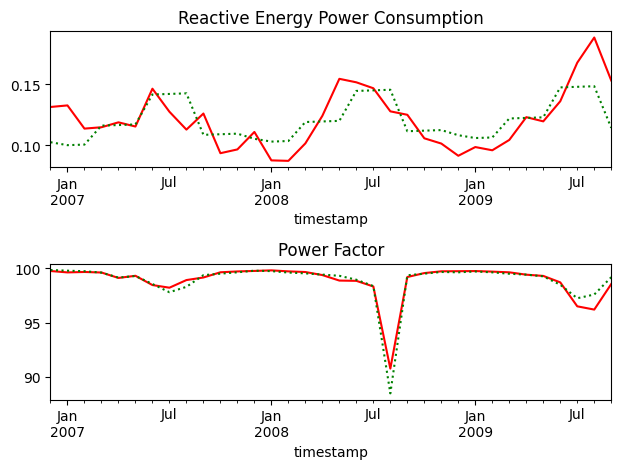

In [73]:
# The reactive predictions are way worse than the other model, but is is still very good, and the power factor is 
# folowing the real values.
plot_reactive_power(real_df_train, pred_df_train)

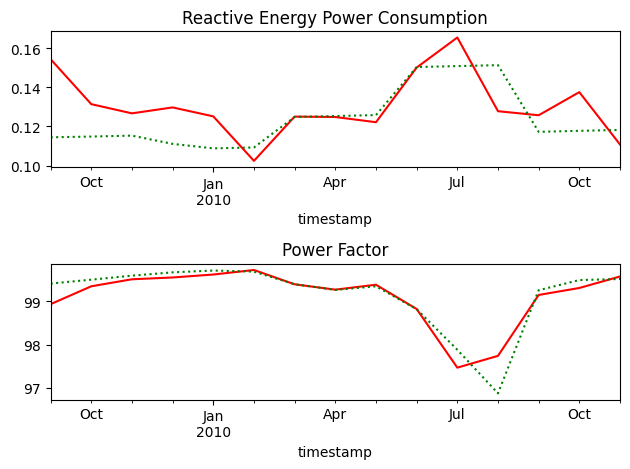

In [74]:
# The power factor were a bit optimistic for Sep/2009 on the test set, but it's close enough.
plot_reactive_power(real_df_test, pred_df_test)

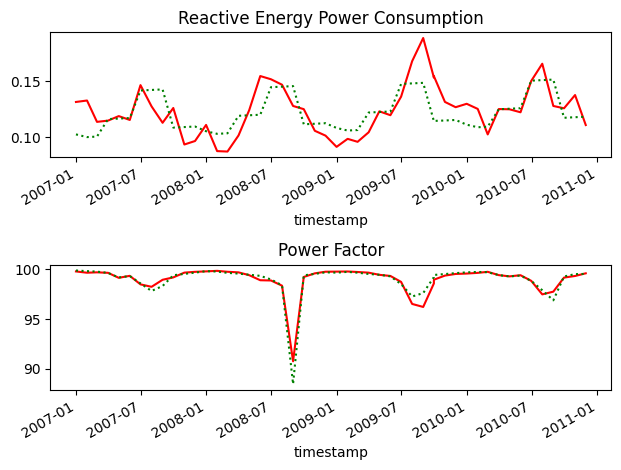

In [75]:
# Looking at the whole period we start to see the deficiencies of this model,
# it creates a simple shape repeating itself over and over. But the power factor is still very close to the real ones.
plot_reactive_power(pd.concat([real_df_train, real_df_test], axis=0), 
                    pd.concat([pred_df_train, pred_df_test], axis=0))

In [76]:
# Creating future dates fo the forecast. 
future_data = pd.date_range(start = "2010-11-26 21:02:00", end = "2011-11-26 21:02:00", freq = "min")

In [77]:
 future_df = pd.DataFrame({
    'Hour': future_data.hour,
    'Dayofweek': future_data.dayofweek,
    'Dayofmonth': future_data.day,
    'Dayofyear': future_data.dayofyear,
    'weekofyear': future_data.isocalendar().week.astype('int'),
    'Month': future_data.month,
    'Quarter': future_data.quarter,
    'Year': future_data.year,
     "season": future_data.month.map({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1})

})
predictions_future = forecast_model.predict(future_df)

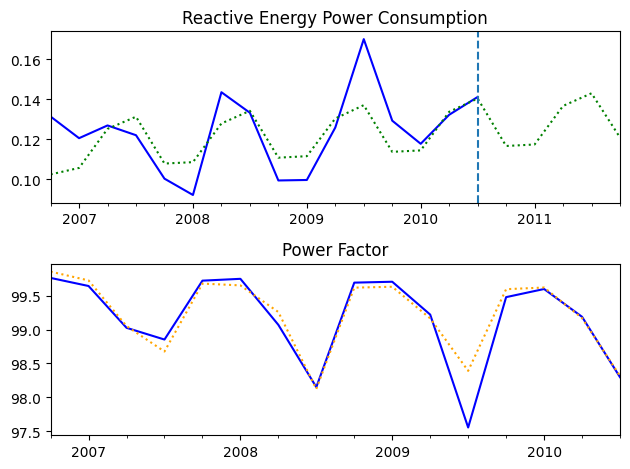

In [78]:
# Creating manually the plots to have better control of the results.
all_x = pd.concat([train_x, test_x, future_df], axis=0)
all_y = pd.concat([train_y, test_y, pd.Series(np.empty(future_df.shape[0]), index = future_data)], axis=0)
all_pred = pd.concat([forecast_model2.predict(train_x), forecast_model2.predict(test_x), forecast_model2.predict(future_df)], axis=0)
                
# Creating plots by Quarters (will also create by Months and Days)
# In the end, I choose this one to put in the presentation, 
# because it shows that the reactive energy power is really increasing, but will
# still be orders of magnitude below the active power, so there is no need 
# to invest in measuring it righ know.
real_df_future, pred_df_future = prepare_to_plot(all_x, all_y, all_pred, "Q") 

real_df_future["type"] = np.select([real_df_future.index <= max(train_x.index),
                                   real_df_future.index < max(test_x.index),
                                    real_df_future.index > max(test_x.index)],
                                   ["Train","Test","Future"])

pred_df_future["type"] = real_df_future["type"]

plt.subplot(2,1,1)
real_df_future[real_df_future["type"] != "Future"]["global_reactive_power"].plot(c="blue")
pred_df_future["global_reactive_power"].plot(c="green", linestyle="dotted")
plt.axvline(max(real_df_future[real_df_future["type"] == "Test"].index), linestyle="dashed")
plt.title("Reactive Energy Power Consumption")

plt.subplot(2,1,2)
real_df_future[real_df_future["type"] != "Future"]["power_factor"].plot(c="blue")
pred_df_future[real_df_future["type"] != "Future"]["power_factor"].plot(c="orange", linestyle="dotted")

plt.title("Power Factor")
plt.tight_layout()

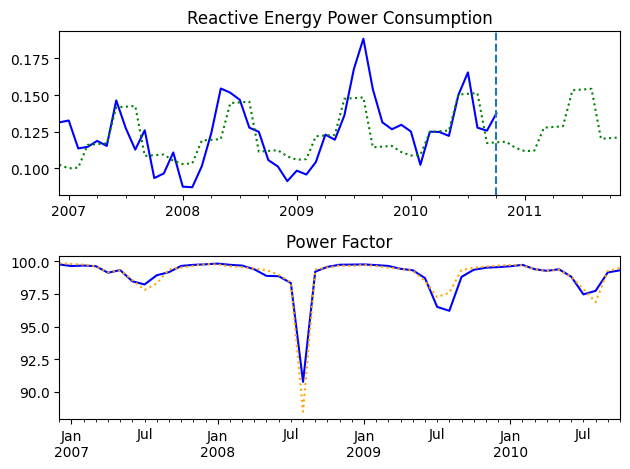

In [80]:
# Creating plots by Months
real_df_future, pred_df_future = prepare_to_plot(all_x, all_y, all_pred, "M") 

real_df_future["type"] = np.select([real_df_future.index <= max(train_x.index),
                                   real_df_future.index < max(test_x.index),
                                    real_df_future.index > max(test_x.index)],
                                   ["Train","Test","Future"])

pred_df_future["type"] = real_df_future["type"]

plt.subplot(2,1,1)
real_df_future[real_df_future["type"] != "Future"]["global_reactive_power"].plot(c="blue")
pred_df_future["global_reactive_power"].plot(c="green", linestyle="dotted")
plt.axvline(max(real_df_future[real_df_future["type"] == "Test"].index), linestyle="dashed")
plt.title("Reactive Energy Power Consumption")

plt.subplot(2,1,2)
real_df_future[real_df_future["type"] != "Future"]["power_factor"].plot(c="blue")
pred_df_future[real_df_future["type"] != "Future"]["power_factor"].plot(c="orange", linestyle="dotted")

plt.title("Power Factor")
plt.tight_layout()

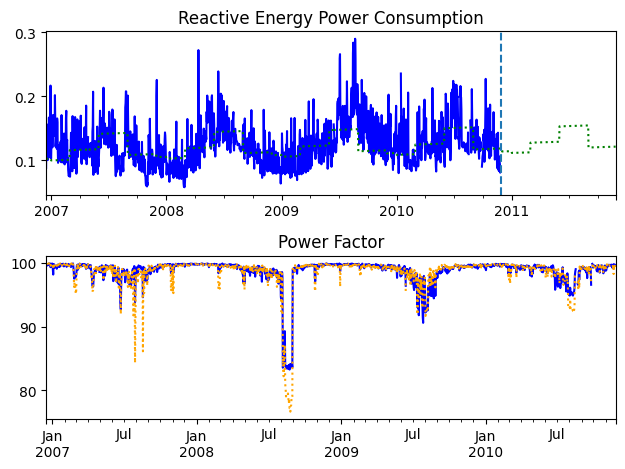

In [81]:
# Creating plots by Days
real_df_future, pred_df_future = prepare_to_plot(all_x, all_y, all_pred, "D") 

real_df_future["type"] = np.select([real_df_future.index <= max(train_x.index),
                                   real_df_future.index < max(test_x.index),
                                    real_df_future.index > max(test_x.index)],
                                   ["Train","Test","Future"])

pred_df_future["type"] = real_df_future["type"]

plt.subplot(2,1,1)
real_df_future[real_df_future["type"] != "Future"]["global_reactive_power"].plot(c="blue")
pred_df_future["global_reactive_power"].plot(c="green", linestyle="dotted")
plt.axvline(max(real_df_future[real_df_future["type"] == "Test"].index), linestyle="dashed")
plt.title("Reactive Energy Power Consumption")

plt.subplot(2,1,2)
real_df_future[real_df_future["type"] != "Future"]["power_factor"].plot(c="blue")
pred_df_future[real_df_future["type"] != "Future"]["power_factor"].plot(c="orange", linestyle="dotted")

plt.title("Power Factor")
plt.tight_layout()